## code

In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv(r'D:\Machine Learning\Datasets\spam_ham_dataset.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [3]:
df.shape

(5171, 4)

In [4]:
df.drop(columns=['Unnamed: 0', 'label'], inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       5171 non-null   object
 1   label_num  5171 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 80.9+ KB


In [6]:
df.duplicated().sum()

178

In [7]:
df = df.drop_duplicates(keep='first')

In [8]:
df.shape

(4993, 2)

In [9]:
df.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [10]:
df['label_num'].value_counts()

0    3531
1    1462
Name: label_num, dtype: int64

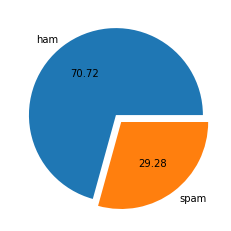

In [30]:
import matplotlib.pyplot as plt
plt.pie(df['label_num'].value_counts(), explode = [0,0.1], labels=['ham', 'spam'],autopct="%0.2f")
plt.show()

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
df['num_characters'] = df['text'].apply(len)

In [13]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [14]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [15]:
df.head()

,text,label_num,num_characters,num_words,num_sentences
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3


In [36]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4993.000000,4993.000000,4993.000000
mean,1069.426397,233.678149,13.305628
std,1547.863387,340.702932,26.887339
min,11.000000,2.000000,1.000000
25%,256.000000,55.000000,4.000000
50%,557.000000,125.000000,7.000000
75%,1262.000000,288.000000,15.000000
max,32258.000000,8863.000000,1204.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

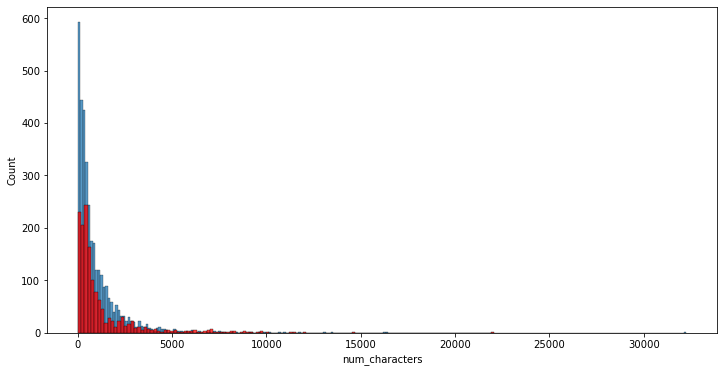

In [37]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['label_num'] == 0]['num_characters'])
sns.histplot(df[df['label_num'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

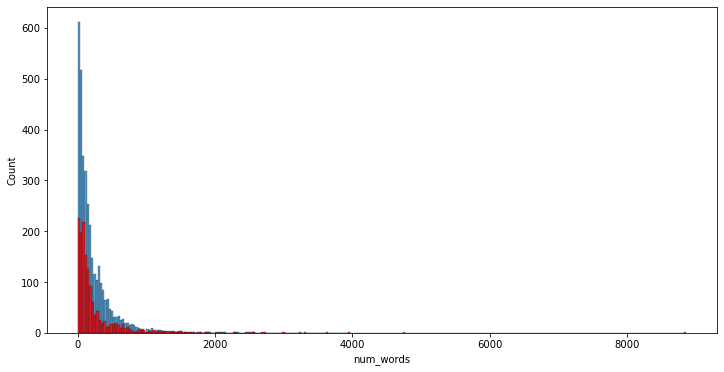

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label_num'] == 0]['num_words'])
sns.histplot(df[df['label_num'] == 1]['num_words'],color='red')

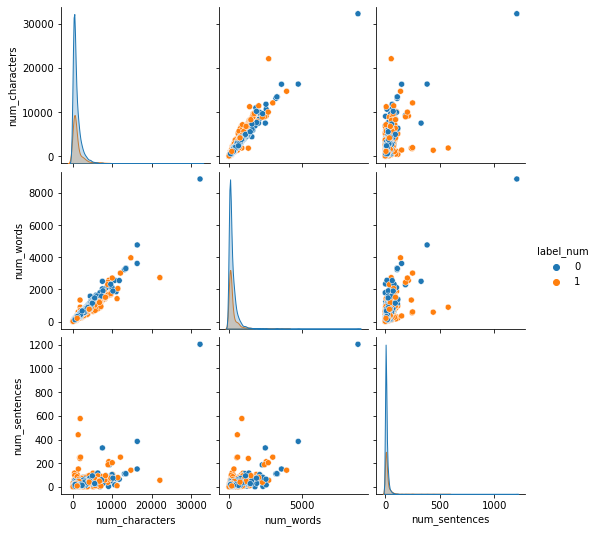

In [39]:
sns.pairplot(df,hue='label_num')

In [16]:
pat = 'Subject:'
df['text'] = df['text'].str.replace(pat, '')

In [17]:
df.head()

,text,label_num,num_characters,num_words,num_sentences
0,enron methanol ; meter # : 988291\r\nthis is ...,0,327,68,3
1,"hpl nom for january 9 , 2001\r\n( see attache...",0,97,24,3
2,"neon retreat\r\nho ho ho , we ' re around to ...",0,2524,551,24
3,"photoshop , windows , office . cheap . main t...",1,414,49,3
4,re : indian springs\r\nthis deal is to book t...,0,336,71,3


In [18]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from nltk.corpus import stopwords
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [20]:
df.head()

,text,label_num,num_characters,num_words,num_sentences
0,enron methanol ; meter # : 988291\r\nthis is ...,0,327,68,3
1,"hpl nom for january 9 , 2001\r\n( see attache...",0,97,24,3
2,"neon retreat\r\nho ho ho , we ' re around to ...",0,2524,551,24
3,"photoshop , windows , office . cheap . main t...",1,414,49,3
4,re : indian springs\r\nthis deal is to book t...,0,336,71,3


In [21]:
df.drop(columns=['num_characters','num_words','num_sentences', ], inplace = True)

In [22]:
df.head()

,text,label_num
0,enron methanol ; meter # : 988291\r\nthis is ...,0
1,"hpl nom for january 9 , 2001\r\n( see attache...",0
2,"neon retreat\r\nho ho ho , we ' re around to ...",0
3,"photoshop , windows , office . cheap . main t...",1
4,re : indian springs\r\nthis deal is to book t...,0


In [23]:
df['new_transformed_text'] = df['text'].apply(transform_text)

In [24]:
df.head()

,text,label_num,new_transformed_text
0,enron methanol ; meter # : 988291\r\nthis is ...,0,enron methanol meter 988291 follow note gave m...
1,"hpl nom for january 9 , 2001\r\n( see attache...",0,hpl nom januari 9 2001 see attach file hplnol ...
2,"neon retreat\r\nho ho ho , we ' re around to ...",0,neon retreat ho ho ho around wonder time year ...
3,"photoshop , windows , office . cheap . main t...",1,photoshop window offic cheap main trend abas d...
4,re : indian springs\r\nthis deal is to book t...,0,indian spring deal book teco pvr revenu unders...


In [49]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=15,background_color='white')

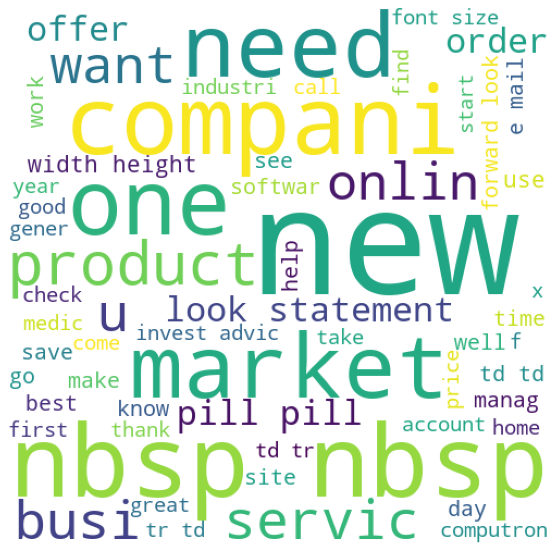

In [50]:
spam_wc = wc.generate(df[df['label_num'] == 1]['new_transformed_text'].str.cat(sep=" "))


plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(spam_wc)

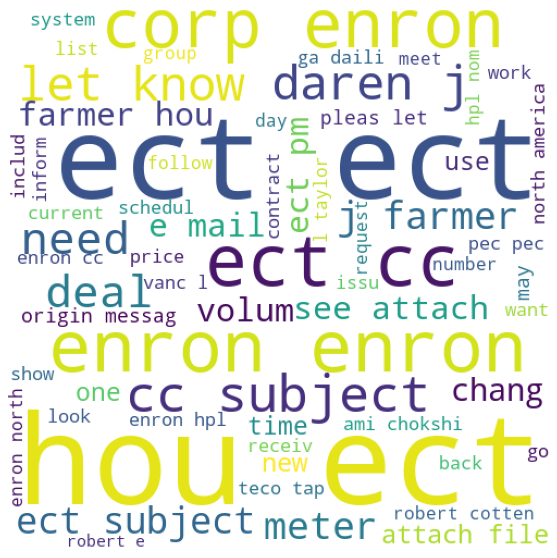

In [51]:
spam_wc = wc.generate(df[df['label_num'] == 0]['new_transformed_text'].str.cat(sep=" "))


plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(spam_wc)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer(max_features=3000)

In [26]:
#x= cv.fit_transform(df['new_transformed_text']).toarray()
x= tf.fit_transform(df['new_transformed_text']).toarray()
x.shape

(4993, 3000)

In [27]:
y = df['label_num'].values

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

accuracy_score 0.960960960960961
precision_score 0.9100719424460432


Text(42.0, 0.5, 'Truth')

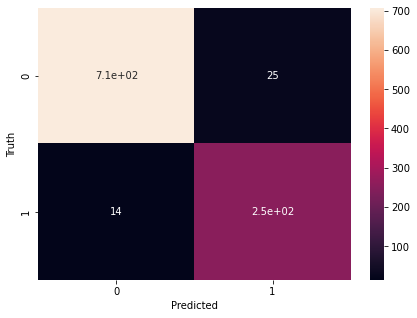

In [31]:
gnb.fit(x_train,y_train)
pred1 = gnb.predict(x_test)
print('accuracy_score',accuracy_score(y_test,pred1))
print('precision_score',precision_score(y_test,pred1))
cm = confusion_matrix(y_test,pred1)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

accuracy_score 0.950950950950951
precision_score 0.8758620689655172


Text(42.0, 0.5, 'Truth')

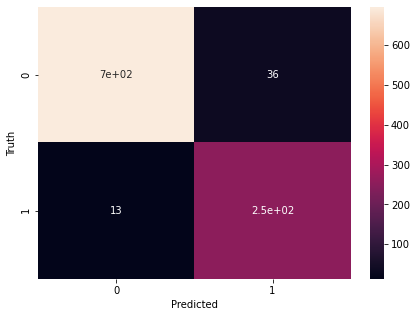

In [32]:
mnb.fit(x_train,y_train)
pred2 = mnb.predict(x_test)
print('accuracy_score',accuracy_score(y_test,pred2))
print('precision_score',precision_score(y_test,pred2))
cm = confusion_matrix(y_test,pred2)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

accuracy_score 0.9459459459459459
precision_score 0.8610169491525423


Text(42.0, 0.5, 'Truth')

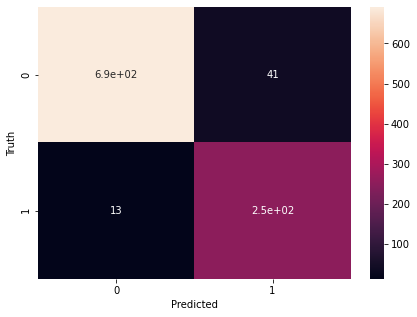

In [33]:
bnb.fit(x_train,y_train)
pred3 = bnb.predict(x_test)
print('accuracy_score',accuracy_score(y_test,pred3))
print('precision_score',precision_score(y_test,pred3))
cm = confusion_matrix(y_test,pred3)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

accuracy_score 0.978978978978979
precision_score 0.9392857142857143


Text(42.0, 0.5, 'Truth')

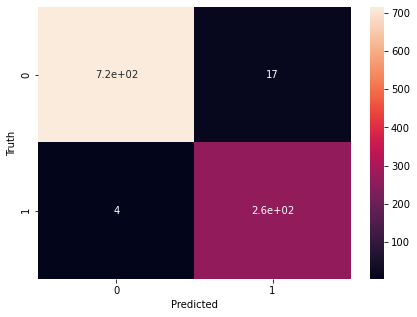

In [34]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=100, random_state=2,n_jobs = -1)
etc.fit(x_train,y_train)

pred8 = etc.predict(x_test)
print('accuracy_score',accuracy_score(y_test,pred8))
print('precision_score',precision_score(y_test,pred8))
cm = confusion_matrix(y_test,pred8)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [57]:
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=100, random_state=2,n_jobs = -1)

from sklearn.ensemble import VotingClassifier

In [58]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(x_train,y_train)



VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et', ExtraTreesClassifier(random_state=2))],
                 voting='soft')

In [59]:
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.982982982982983
Precision 0.9528985507246377


Text(42.0, 0.5, 'Truth')

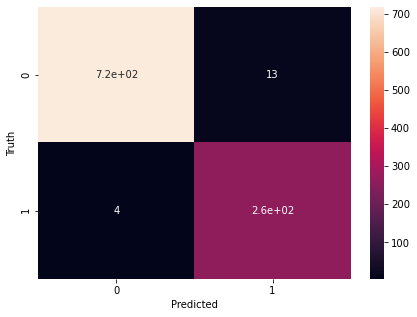

In [60]:
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [39]:
tf

TfidfVectorizer(max_features=15000)

In [40]:
import pickle
pickle.dump(tf,open('vectorizerspam.pkl','wb'))
pickle.dump(etc,open('etcmodelspam.pkl','wb'))